<h1><center>  Supervised Learning Capstone </center></h1>
<h2><center> Hate Speech on Twitter- A Natural Language Processing Challenge</center></h2>

### Author: Ashley Steele

# Project Outline

This project consists of the following:

[1. About the Dataset](#1.-About-the-Dataset)


[2. Exploratory Data Analysis (EDA)](#2.-Exploratory-Data-Analysis-(EDA))
- [2.1: Data Loading and Initial Exploration](#2.1:-Data-Loading-and-Initial-Exploration)
- [2.2: Cleaning/Visualizing Variables and Feature Engineering](#2.2:-Cleaning/Visualizing-Variables-and-Feature-Engineering)
- [2.3: Thoroughly Cleaning the Text of Our Tweets](#2.3:-Thoroughly-Cleaning-the-Text-of-Our-Tweets)
- [2.4: Setting Up Text to Make Keyword Determination Easier](#2.4:-Setting-Up-Text-to-Make-Keyword-Determination-Easier)
- [2.5: Identifying Keywords and Common Words](#2.5:-Identifying-Keywords-and-Common-Words)

[3. Modeling Our Data](#3.-Modeling-Our-Data)
- [3.1: Set Up & Testing Our Labels](#3.1:-Set-Up-&-Testing-Our-Labels)
- [3.2: Creating hold-out groups and testing](#3.2:-Creating-hold-out-groups-and-testing)
- [3.3: Parameter Manipulation within Multinomial Naive Bayes](#3.3:-Parameter-Manipulation-within-Multinomial-Naive-Bayes)
- [3.4: Testing Additional Models](#3.4:-Testing-Additional-Models)
    * [3.4a: Complement Naive Bayes](#3.4a:-Complement-Naive-Bayes)
    * [3.4b: Decision Tree Model](#3.4b:-Decision-Tree-Model)
    * [3.4c: KNN Classifier Model](#3.4c:-KNN-Classifier-Model)

[4. Label Improvement & Future Implications](#4.-Label-Improvement-&-Future-Implications)

[5. Analysis/Reflection](#5.-Analysis/Reflection)
- [5.1: Analysis of Overall Project & Future Implications](#5.1:-Analysis-of-Overall-Project-&-Future-Implications)
- [5.2: Personal Reflection](#5.2:-Personal-Reflection)

## 1. About the Dataset
[Back to Outline](#Project-Outline)

**Twitter Sentiment Analysis**



Hate speech, as defined by the [Oxford Constitutional Law website](https://oxcon.ouplaw.com/view/10.1093/law-mpeccol/law-mpeccol-e130), is **"verbal or non-verbal communication that involves hostility directed towards particular social groups, most often on the grounds of race and ethnicity (racism, xenophobia, anti-Semitism, etc), gender (sexism, misogyny), sexual orientation (homophobia, transphobia), age (ageism), disability (ableism), etc."**

The aim of this dataset is to determine if a set of 30,000 tweets contains hate speech relating to sexism and racism in order to create predictive models to identify such language in the future.



Link to the original dataset: [here](https://datahack.analyticsvidhya.com/contest/practice-problem-twitter-sentiment-analysis/)



## 2. Exploratory Data Analysis (EDA)
[Back to Outline](#Project-Outline)

In [2]:
# Importing all of the resources I will need for this project!
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import os

In [3]:
# Setting up my directory so I can access my dataset
os.getcwd()

'C:\\Users\\gothv\\Practice\\Thinkful- Assignments'

In [4]:
os.chdir('C:\\Users\\gothv\\OneDrive\\Desktop\\Data\\Datasets\\sl_capstone_data')

In [5]:
os.getcwd()

'C:\\Users\\gothv\\OneDrive\\Desktop\\Data\\Datasets\\sl_capstone_data'

### 2.1: Data Loading and Initial Exploration 
[Back to Outline](#Project-Outline)

In [6]:
# Importing the original dataset
df = pd.read_csv('train_tweets_hate_speech.csv')

In [7]:
df.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [9]:
# Looking at the overall layout/information for the dataset
df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [8]:
# What features do we have?
df.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [10]:
# What type of data do we have?
df.dtypes

id        int64
label     int64
tweet    object
dtype: object

### 2.2: Cleaning/Visualizing Variables and Feature Engineering
[Back to Outline](#Project-Outline)

In [11]:
# Locating any missing values
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

Whew! Thankfully, this dataset does not have any missing variables so I am going to keep moving on in our process

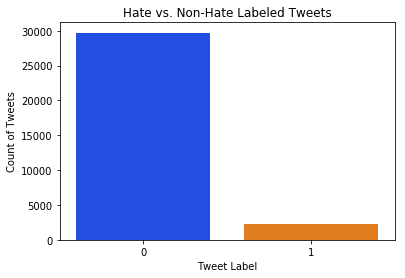

In [12]:
# What does the distribution of our lables look like?
sns.countplot(x= df['label'], data= df, palette = 'bright')
plt.title('Hate vs. Non-Hate Labeled Tweets')
plt.xlabel('Tweet Label')
plt.ylabel('Count of Tweets');

In [13]:
# Interesting. What are the actual counts of hate labeled(1) and non-hate labeled(0)?
df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

**Takeaway:** Our dataset is primarily labled as non-hate speech tweets (93% of total tweets). Our tweets labeled as hate speech are only about 7% of our total tweets.

My next question: does lenght of tweet relate to the label of the tweet?

In [14]:
# Creating a new column to measure the length of each tweet
df['tweet_length'] = (df['tweet']).str.len()

# Sorting df by length of tweet, from longest to shortest
df.sort_values(by = 'tweet_length', ascending= False, inplace = True);

In [15]:
df.head(50)

,id,label,tweet,tweet_length
19770,19771,0,@user lmfao pathetic #soit #growup #funny #...,274
13459,13460,0,awesom beautiful wonderfulððððð...,247
18433,18434,0,@user rotterdam â¢ socafrenzy â¢ ðð¿ð...,203
31485,31486,0,&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&g...,201
11283,11284,0,@user st lucia â¢ socafrenzy ðð¿ðð...,199
26150,26151,0,rotterdam â¢ socafrenzy â¢ ðð¿ðð¿...,196
14632,14633,0,@user âï¸ï¸ð¸donald trump âï¸ð¸was...,180
11960,11961,0,oasis parkð¤bbq canvasâ³â³âµâ³âµ ðð...,178
15241,15242,0,"happy fasting,happy saturday, happy weekend ha...",177
24776,24777,0,happy father's day ð #ç¶ã®æ¥ #ã¹ã¿ã¼...,174


**Interesting:** in the top 50 longest tweets only **one** is labled as hate speech. Let's check out the 50 shortest tweets for their labels.

In [18]:
df.tail(50)

,id,label,tweet,tweet_length
27032,27033,1,a deeper look,15
23417,23418,0,3 - 0 belgium,15
3811,3812,0,bihday to me,15
12305,12306,1,@user i agree.,15
30939,30940,0,you disgust me,15
27226,27227,0,it's euro eve,15
29138,29139,0,thank you god,15
26205,26206,0,shrek 2 is on,15
7693,7694,0,well said ð,15
15880,15881,0,kill me #meme,15


In the last 50 tweets only **3** are labeled as hate speech. Let's compare the average lenght of a tweet from both labels.

In [19]:
# Creating sub-data frames with just hate or not hate labeled tweets
hate_df= df.loc[df['label']== 1]
nothate_df = df.loc[df['label']== 0]

In [20]:
# What is the average length of a hate-labeled tweet?
round(hate_df['tweet_length'].mean(), 2)

90.19

In [21]:
# What is the average length of a non-hate labeled tweet?
round(nothate_df['tweet_length'].mean(), 2)

84.33

**Takeaway:** We've learned that, on average, tweets labeled as hate speech have more characters and are longer.

## 2.3: Thoroughly Cleaning the Text of Our Tweets
[Back to Outline](#Project-Outline)

The original text of our tweets is littered with non-English symbols, hashtags, and other "junk" that make it hard for our computer to process. We need to clean the tweets up significantly before we can do any modeling!

In [22]:
# Since the original tweets contain extra letters/non-words I will be using the regex feature to clean them up.
import re

In [23]:
# After browsing the head of our dataset I created myown list of "stop" words to help make cleaning easier
remove_words = ['the', 'a', 'and', 'an', 'to', 'is', 'if', 'you', 'i', 'am', 'in', '[^a-zA-Z0-9 ]', 'so', 'u',
                'his', 'he', 'she','into','when', 'for', 'ur', 'cant', 'have', 'my', 'this', 'just', 'its', 'm', 
                'we', 'cant', 'what', 'how', 'be', 'dont', 'are', 'it', 'why', 'can', 'all', 'now', 'got', 'might', 
                'latest', 'no' , 'do', 'your', 'will', 'did', 'that', 'one', 'top', 'huh', 'as', 'at', 'bihday', 'like', 'amp']

In [24]:
# Using regex to identify non-text, remove it, and return a new, clean tweet column
pat = r'\b(?:{})\b'.format('|'.join(remove_words))
df['cleaned_tweet'] = df['tweet'].str.replace(pat, '')
df['cleaned_tweet'] = df.cleaned_tweet.str.replace('#','' ).str.replace('@user', '').str.replace('ð', '').str.replace('', '').str.replace('±', '')
df.cleaned_tweet.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)

## 2.4: Setting Up Text to Make Keyword Determination Easier
[Back to Outline](#Project-Outline)

Now that we have clean(er) tweets we need to look at the individual words to determine if there are patterns within the labels. 

In [25]:
# Importing the CountVectorizer from Sklearn!
from sklearn.feature_extraction.text import CountVectorizer

# Setting the max amount of features created to 5,000
vectorizer = CountVectorizer(max_features= 5000)

In [26]:
# Vectorize our cleaned tweets to transform the tweets into columns.
X = vectorizer.fit_transform(df['cleaned_tweet'])

# Putting these new split words into a table
bag_of_words = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names())

In [27]:
# Double checking to make sure that it worked
bag_of_words.head()

,01,02,03,05,10,100,1000,101,10k,11,...,yyc,zara,zealand,zelda,zen,zero,zionism,zone,zoo,zoro
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2.5: Identifying Keywords and Common Words
[Back to Outline](#Project-Outline)

Since we have now cleaned our original tweets into something easier to read/process we need to look deeper into what patterns, if any, are present in specific types of tweets. The following code progression was inspired by Susan Li and her article, "[A Complete Exploratory Data Analysis and Visualization for Text Data"](https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a).

In [28]:
# Seeing the top 20 most used words- without using the stop words parameter
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    word_bag = vec.transform(corpus)
    sum_words = word_bag.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['cleaned_tweet'], 20)
#for word, freq in common_words:
    #print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['word' , 'count'])
df1.groupby('word').sum()['count'].sort_values(ascending=False);

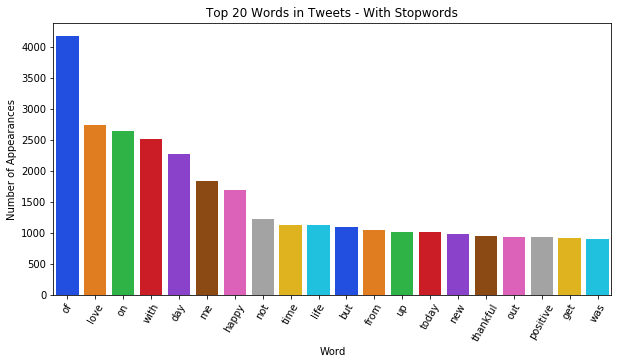

In [29]:
# What does this look like?
plt.figure(figsize= (10,5))
sns.barplot(x= df1['word'], y= df1['count'], data = df, palette= 'bright')
plt.xticks(rotation= 60)
plt.title('Top 20 Words in Tweets - With Stopwords')
plt.ylabel('Number of Appearances')
plt.xlabel('Word');

Oh no! We still have little "filler" words like "of" in our analysis. Let's use SciKitLearn's default English stop words to clean this up even more!

In [30]:
# Trying to clean up our cleaned tweets even more by using the default English stop words & re-running top 20
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    word_bag = vec.transform(corpus)
    sum_words = word_bag.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['cleaned_tweet'], 20)

df2 = pd.DataFrame(common_words, columns = ['word' , 'count'])
df2.groupby('word').sum()['count'].sort_values(ascending=False);

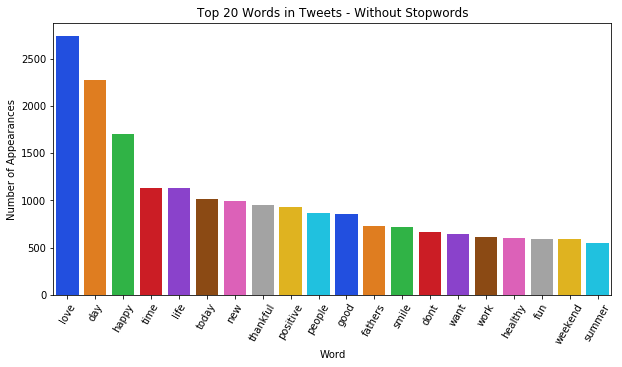

In [31]:
# What does this look like?
plt.figure(figsize= (10,5))
sns.barplot(x= df2['word'], y= df2['count'], data = df, palette= 'bright')
plt.xticks(rotation= 60)
plt.title('Top 20 Words in Tweets - Without Stopwords')
plt.ylabel('Number of Appearances')
plt.xlabel('Word');

Excellent! We now have a rough idea of what words are most common within our entire dataset. 
**Takeaway:** The majority of our tweets seem to have a positive theme, based on the most frequently occuring words (love, happy, life, thankful, etc..) 

**Next question:** Can we pick out the most common words in tweets labeled negative?

In [32]:
# Re-initalizing the "hate" and "not-hate" dataframes to include cleaned tweets
hate_df= df.loc[df['label']== 1]
nothate_df = df.loc[df['label']== 0]

First, let's see what the top 20 words in our non-hate labeled tweets are.

In [33]:
# Trying to see what the top 20 words in non-hate labeled tweets are
common_words = get_top_n_words(nothate_df['cleaned_tweet'], 20)

nothate_df2= pd.DataFrame(common_words, columns = ['word', 'count'])
nothate_df2.groupby('word').sum()['count'].sort_values(ascending = False);

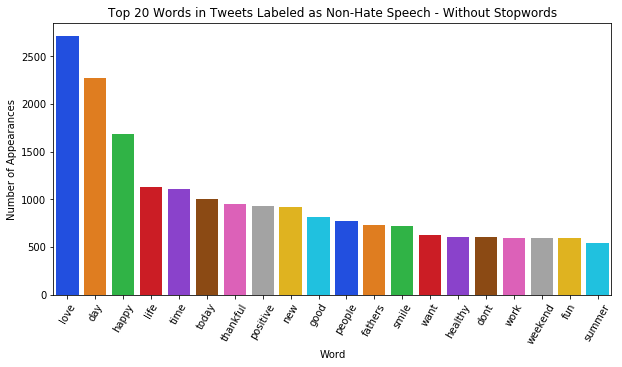

In [34]:
# Visualization of the top 20 occuring words in the non-hate labeled tweets
plt.figure(figsize= (10,5))
sns.barplot(x= nothate_df2['word'], y= nothate_df2['count'], data = nothate_df, palette= 'bright')
plt.xticks(rotation= 60)
plt.title('Top 20 Words in Tweets Labeled as Non-Hate Speech - Without Stopwords')
plt.ylabel('Number of Appearances')
plt.xlabel('Word');

**Takeaway:** Since our dataset is made up of mostly non-hate labeled tweets our top 20 words pretty much stayed the same after splitting the dataset.

In [35]:
# Trying to see if I can get the top 20 words for tweets with a negative label
common_words = get_top_n_words(hate_df['cleaned_tweet'], 20)

hate_df2 = pd.DataFrame(common_words, columns = ['word' , 'count'])
hate_df2.groupby('word').sum()['count'].sort_values(ascending=False);

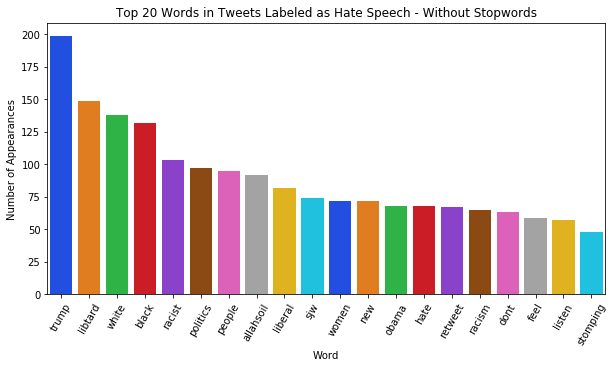

In [36]:
# Visualization of the top 20 occuring words in the hate-labeled tweets
plt.figure(figsize= (10,5))
sns.barplot(x= hate_df2['word'], y= hate_df2['count'], data = hate_df, palette= 'bright')
plt.xticks(rotation= 60)
plt.title('Top 20 Words in Tweets Labeled as Hate Speech - Without Stopwords')
plt.ylabel('Number of Appearances')
plt.xlabel('Word');

**Takeaway:** Our top 20 words in the hate labeled tweets are drastically different from the non-hate labled tweets. Top occuring words are Trump, libtard, white, black, racist, & politics. It is interesting to note that both subsets have one word in their top 20 that overlaps: people.

**NOTE:** It's super important to pay attention to what words occur above and understand if they are actually words. For example: originally "amp" was the most frequently occuring word in tweets labeled as hate speech, but "amp" is what the ampersand (&) symbol was translated into when the text was scrapped from Twitter. The graph above reflects this update.

Additionally, tweets often contain acronyms that aren't easily understood. In the graph above we have two: sjw (social justic warrior) and allahsoil(a common hashtag in this dataset that is associated with tweets involving Islamic references).

With SKLearn we can also look for the top bigrams(two word combinations) and trigrams (three word combinations) within our dataset.

In [37]:
# Getting top bigrams after stop words removed main dataset
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    word_bag = vec.transform(corpus)
    sum_words = word_bag.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_bigram(df['cleaned_tweet'], 20)

df3= pd.DataFrame(common_words, columns = ['word' , 'count'])
df3.groupby('word').sum()['count'].sort_values(ascending=False);

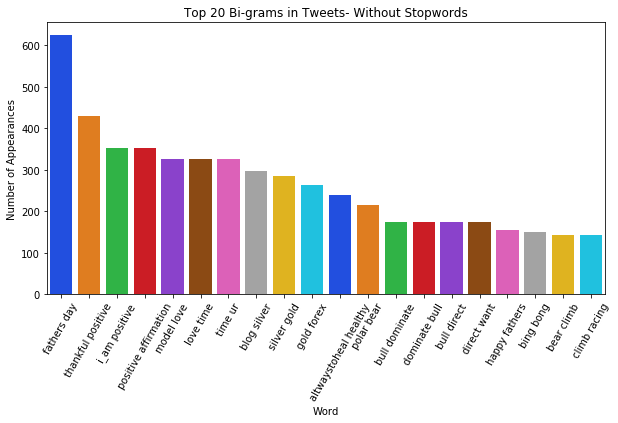

In [38]:
# Visualization of top bigrams in overall dataset
plt.figure(figsize= (10,5))
sns.barplot(x= df3['word'], y= df3['count'], data = df, palette= 'bright')
plt.xticks(rotation= 60)
plt.title('Top 20 Bi-grams in Tweets- Without Stopwords')
plt.ylabel('Number of Appearances')
plt.xlabel('Word');

In [39]:
# top bigrams in hate labeled after removing stop words
common_words= get_top_n_bigram(hate_df['cleaned_tweet'], 20)

hate_bigrams= pd.DataFrame(common_words, columns = ['word', 'count'])
hate_bigrams.groupby('word').sum()['count'].sort_values(ascending= False);

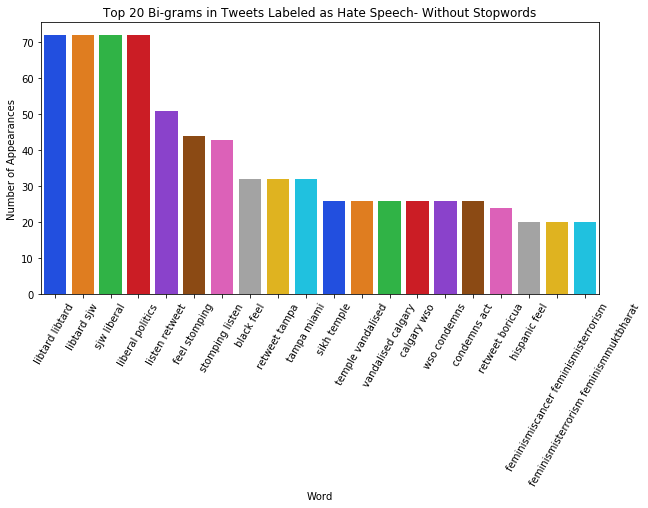

In [40]:
# Visualization of top trigrams in hate labeled dataset
plt.figure(figsize= (10,5))
sns.barplot(x= hate_bigrams['word'], y= hate_bigrams['count'], data = hate_df, palette= 'bright')
plt.xticks(rotation= 60)
plt.title('Top 20 Bi-grams in Tweets Labeled as Hate Speech- Without Stopwords')
plt.ylabel('Number of Appearances')
plt.xlabel('Word');

**Takeway:** For non-hate labeled tweets the top occuring bigrams have a positive connotation (at least two contain the actual word "positive") while the top bigrams in the hate-labeled tweets use political slurs, such as "libtard" and "sjw".

**Acronym translation: WSO, in these tweets, refers to World Sikh Organization, a Canadian organization created to help support Sikh individuals in their communities.**

In [41]:
# Top tri-grams in all tweets after remoing stop words 
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    word_bag = vec.transform(corpus)
    sum_words = word_bag.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_trigram(df['cleaned_tweet'], 20)

df4= pd.DataFrame(common_words, columns= ['word', 'count'])
df4.groupby('word').sum()['count'].sort_values(ascending= False);

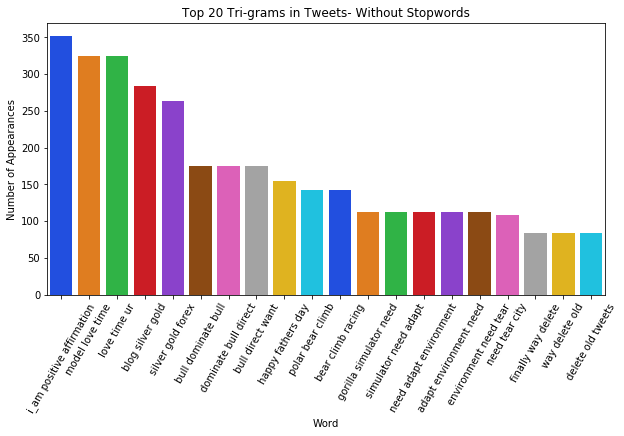

In [42]:
# Visualization of top trigrams in entire dataset
plt.figure(figsize= (10,5))
sns.barplot(x= df4['word'], y= df4['count'], data = df, palette= 'bright')
plt.xticks(rotation= 60)
plt.title('Top 20 Tri-grams in Tweets- Without Stopwords')
plt.ylabel('Number of Appearances')
plt.xlabel('Word');

In [43]:
# Looking for most common trigrams in hate labeled
common_words= get_top_n_trigram(hate_df['cleaned_tweet'], 20)

hate_trigram= pd.DataFrame(common_words, columns= ['word', 'count'])
hate_trigram.groupby('word').sum()['count'].sort_values(ascending = False);

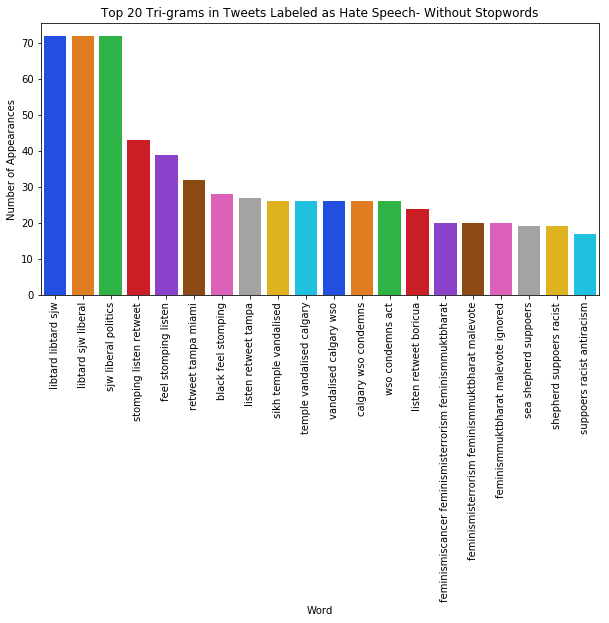

In [44]:
# Visualization of top trigrams in hate-labeled tweets
plt.figure(figsize= (10,5))
sns.barplot(x= hate_trigram['word'], y= hate_trigram['count'], data = hate_df, palette= 'bright')
plt.xticks(rotation= 90)
plt.title('Top 20 Tri-grams in Tweets Labeled as Hate Speech- Without Stopwords')
plt.ylabel('Number of Appearances')
plt.xlabel('Word');

**Takeaway:** The overall negative tone and use of insults & slurs in hate-labeled tweets only increases as we add more combinations of frequently occuring words. 

## 3. Modeling Our Data
[Back to Outline](#Project-Outline)

Now that we have analyzed the most frequently occuring words in both hate and non-hate labeled tweets we have a better overall picture of how the original data is labeled. Although the labels are not the most accurate (more on that in [4. Label Improvement & Future Implications](#4.-Label-Improvement-&-Future-Implications)) we can use what we already know to generate some predictive models to hopefully help detect racist and sexist hate speech in the future.

### 3.1: Set Up & Testing Our Labels
[Back to Outline](#Project-Outline)

To create our model we first need to know what our over-arching question for our model is and set our feature variables (X) and target variable (Y). Overall, we want to know if a tweet, that we have never seen before, contains hate speech. Our null hypothesis then becomes "no, this tweet does not contain hate speech."

In [45]:
# Setting up the X and Y for our models
X = bag_of_words

Y= df['label']

# Since this is a classification model let's try out a Multinomial Naive Bayes first
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

As noted in the introduction to this section the labels provided with the dataset identifying tweets as hate/non-hate speech are not the most accurate. Let's test out "fake" tweets below on the entire data set to see if:
1. The labels are mostly accurate
2. What keywords trigger which labels
3. Can a model predict what type of speech the "fake" tweets are?

In [46]:
# Playing around to test if this works
practice_model = model.fit(X, Y)
test_tweet = ["my black dog is muslim and loves islam"]

X_test = vectorizer.transform(test_tweet).toarray()

# I want to see what type of label the model will give my test_tweet
prediction = practice_model.predict(X_test)
print(prediction)

[1]


Interesting! In the tweet above I played arround with different frequently-occuring words from the tweets labled "hate speech" in the dataset to see if I could create a harmless, non-hateful text that flagged itself as hate speech. Another example of such a fake tweet is below. 

In [47]:
# Playing around to test if this works
test_tweet2 = ["Trump wears black shoes approprate to his sex."]

X_test = vectorizer.transform(test_tweet2).toarray()

# I want to see what type of label the model will give my test_tweet
prediction = practice_model.predict(X_test)
print(prediction)

[1]


After my initial first look at the dataset I knew that the original labels of hate or not hate speech were flawed, but, after creating my own sample tweets, I now understand more of the subtle keywords that are tagged as hate. Try to create your own sample tweet below to play with the original keywords!

In [48]:
# Playing around to test if this works
test_tweet1 = [input("enter phrase: ")] 

X_test = vectorizer.transform(test_tweet1).toarray()

# I want to see what type of label the model will give my test_tweet
prediction = practice_model.predict(X_test)
print(prediction)

enter phrase: white potato named hillary trump
[1]


As you can see from your own experimenting above the original keywords and labeling for this dataset are flawed and will be treated with a grain of salt going forward. Based on this information I have decided to go ahead with the data as they are labeled, for now. At the end of this project I will create my own labels for comparison and modeling.

### 3.2: Creating hold-out groups and testing
[Back to Outline](#Project-Outline)

To start working on our predictive models we first need to start with a basic model to see how it preforms. Let's start with a Multinomial Naive Bayes approach, since our target ("Is this hate speech?") is a binary classification.

In [49]:
# Importing the needed libraries to train, test, and split!
from sklearn.model_selection import train_test_split

# Creating our holdout groups here!
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=20)

In [50]:
# Let's try our model with different hold out groups and see what happens!

print('With 20% Holdout: ' + str(model.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(model.fit(X, Y).score(X, Y)))


#Cross Validation
from sklearn.model_selection import cross_val_score

avg= round((cross_val_score(model, X, Y, cv=5)).mean(), 4)
print('The average cross-validation score for this model is ', avg)

With 20% Holdout: 0.9460347254809949
Testing on Sample: 0.9570114510981791
The average cross-validation score for this model is  0.922


Not too bad! Here is what this means in plain English: 
- On a holdout group of 20% of the total data our model can explain around 95% of the variance
- On our entire dataset our model can explain around 96% of the final variance
- After fine-tuning through cross-validation (multiple subgroups of data are created, take turns being training and testing, and then use the results as an average) our model can explain about 92% of the variance

### 3.3: Parameter Manipulation within Multinomial Naive Bayes
[Back to Outline](#Project-Outline)

Although Multinomial Naive Bayes is a simple model there are three main parameters (details inside of the parenthesis after the model name) that we can manipulate to see if we can improve the performance of our model. Let's do that below!

In [51]:
# Trying out a different smoothing method
smooth_model = MultinomialNB(alpha =1.0)

print('With 20% Holdout: ' + str(smooth_model.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(smooth_model.fit(X, Y).score(X, Y)))

avg= round((cross_val_score(smooth_model, X, Y, cv=5)).mean(), 4)
print('The average cross-validation score for this model is ', avg)

With 20% Holdout: 0.9460347254809949
Testing on Sample: 0.9570114510981791
The average cross-validation score for this model is  0.922


In [52]:
# Playing with the prior class probabilities
model_2 = MultinomialNB(class_prior=None)
print('With 20% Holdout: ' + str(model_2.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(model_2.fit(X, Y).score(X, Y)))

avg= round((cross_val_score(model_2, X, Y, cv=5)).mean(), 4)
print('The average cross-validation score for this model is ', avg)

With 20% Holdout: 0.9460347254809949
Testing on Sample: 0.9570114510981791
The average cross-validation score for this model is  0.922


**Takeaway:** Overall these are basically the same in accuracy. Let's try one that is the opposite of the default.

In [53]:
# This model has the opposite of the default parameters set on each of our three options!
model_3= MultinomialNB(class_prior=None, fit_prior=True)
print('With 20% Holdout: ' + str(model_3.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(model_3.fit(X, Y).score(X, Y)))

avg= round((cross_val_score(model, X, Y, cv=5)).mean(), 4)
print('The average cross-validation score for this model is ', avg)

With 20% Holdout: 0.9460347254809949
Testing on Sample: 0.9570114510981791
The average cross-validation score for this model is  0.922


**Takeaway:** Changing from defaults on this model really doesn't make a difference! Overall, Multinomial Naive Bayes is a pretty accurate model for our NLP sentiment analysis!

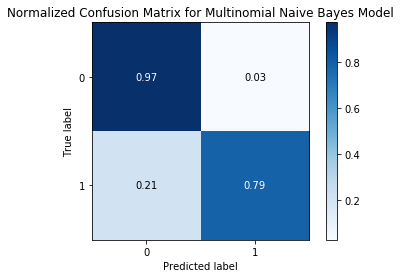

In [54]:
# What does this model's preformance actually look like?
import scikitplot as skplt

y_pred= model.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.title('Normalized Confusion Matrix for Multinomial Naive Bayes Model');

<Figure size 1080x720 with 0 Axes>

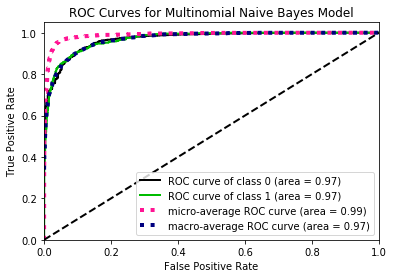

In [55]:
# What do the ROC curves look like for this model?
y_probas = model.predict_proba(X_test)

plt.figure(figsize=(15,10))
skplt.metrics.plot_roc(y_test, y_probas)
plt.title("ROC Curves for Multinomial Naive Bayes Model");

### 3.4: Testing Additional Models 
[Back to Outline](#Project-Outline)

Sure, our Multinomial model was great, but how do other types of models work on predicting hate speech in tweets? Let's find out below!

#### 3.4a: Complement Naive Bayes
[Back to Outline](#Project-Outline)

According to SKlearn documentation one of the best models for NLP(natural language processing) is Complement Naive Bayes. Is this true?

In [56]:
# Importing and creating a Complement NB model!
from sklearn.naive_bayes import ComplementNB
c_model = ComplementNB()

# Demonstrating how successful this model is with out data.

print('With 20% Holdout: ' + str(c_model.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(c_model.fit(X, Y).score(X, Y)))

avg= round((cross_val_score(c_model, X, Y, cv=5)).mean(), 4)
print('The average cross-validation score for this model is ', avg)

With 20% Holdout: 0.8675113405287033
Testing on Sample: 0.8887741693260747
The average cross-validation score for this model is  0.8411


Sorry, SKlearn! On our dataset the Complement Naive Bayes model only explained around 84% of final variance, even after cross-validation. 

**Takeaway:** It's important to always try out additional models, if you have the time and computational power. Just because one is recommended as the best (hah!) doesn't mean it will be!

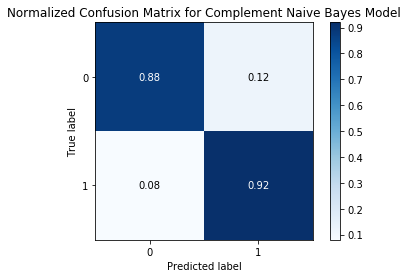

In [57]:
# What does this model's preformance look like?
y_pred= c_model.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.title('Normalized Confusion Matrix for Complement Naive Bayes Model');

<Figure size 1080x720 with 0 Axes>

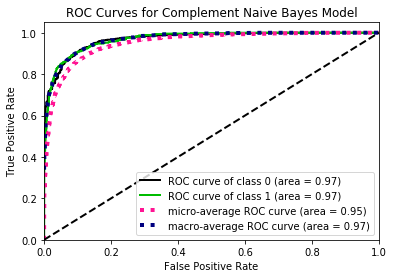

In [58]:
# What do the ROC curves for this model look like?
y_probas = c_model.predict_proba(X_test)

plt.figure(figsize=(15,10))
skplt.metrics.plot_roc(y_test, y_probas)
plt.title("ROC Curves for Complement Naive Bayes Model");

After running the two models above we now know how (some) Naive Bayes models work on our dataset, but what about non-NB models? Let's try some out below!

#### 3.4b: Decision Tree Model
[Back to Outline](#Project-Outline)

Decision trees are excellent models to use in classification because they act like a dichotomus key (anyone remember those from science class?) and asks binary classification questions ("Is this a potato? Yes or no.") to filter through the data. Let's run one on our dataset to see what happens.

In [59]:
# Create decision tree model and run on holdout/sample
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 5)

print('With 20% Holdout: ' + str(clf.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(clf.fit(X, Y).score(X, Y)))

avg= round((cross_val_score(clf, X, Y, cv=5)).mean(), 4)
print('The average cross-validation score for this model is ', avg)

With 20% Holdout: 0.9399343031440638
Testing on Sample: 0.9397096552155685
The average cross-validation score for this model is  0.9341


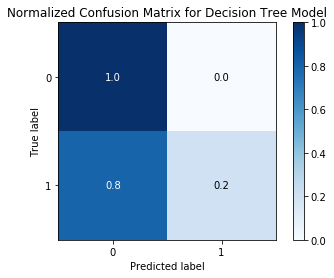

In [60]:
# What does the preformance for this model look like?
y_pred= clf.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.title('Normalized Confusion Matrix for Decision Tree Model');

<Figure size 1080x720 with 0 Axes>

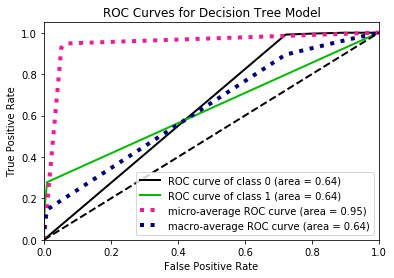

In [61]:
# What do the ROC curves for this model look like?
y_probas = clf.predict_proba(X_test)

plt.figure(figsize=(15,10))
skplt.metrics.plot_roc(y_test, y_probas)
plt.title("ROC Curves for Decision Tree Model");

**Takeaway:** Overall a decision tree model with the max depth (how many layers it can go to) as set above explains variance in our holdout (94%) and sample (94%) pretty well but looses explanatory power when we apply cross-validation to it (84%). This model is not America's Next Predictive Model.

#### 3.4c: KNN Classifier Model
[Back to Outline](#Project-Outline)

KNN (or K-Nearest Neighbor) classifier looks at labeled points in our training set and compares them to points that are close and unlabeled to see if the test data points are, in fact, of the same label. Our KNN classifier below looks at the nearest 3 data points (n_neighbors = 3) to determine the labels for our test data.

In [ ]:
# Create KNN model and run on holdout/sample
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)

print('With 20% Holdout: ' + str(knn.fit(X_train, y_train).score(X_test, y_test)))

In [ ]:
print('Testing on Sample: ' + str(knn.fit(X, Y).score(X, Y)))

My computer can't handle the repeated cross-validation for this model, so I have removed it from my code.

In [ ]:
# What does the preformance of this model look like?
y_pred= knn.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.title('Normalized Confusion Matrix for KNN Classifier Model');

In [ ]:
# What do the ROC curves for this model look like?
y_probas = knn.predict_proba(X_test)

plt.figure(figsize=(15,10))
skplt.metrics.plot_roc(y_test, y_probas)
plt.title("ROC Curves for KNN Classifier Model");

**Takeaway:** Even after cross-validation the KNN classifier model did really well (holdout- 94%, sample- 96%, and after cross-validation - 94%). Although this model is giving us great preformance it is HUGE, takes a ton of computing power, and is, in reality, not too much better at explaining variance than our Multinomial Naive Bayes model. If we were doing more iterations and using the predictive models created in this capstone on larger datasets I would stick to the Multinomial for accuracy and smaller amount of comupting power needed to run it!

## 4. Label Improvement & Future Implications
[Back to Outline](#Project-Outline)

As I mentioned above the original labels provided with this dataset to identify hate or non-hate containing tweets were, at best, inaccurate. After looking closely at a sample of 20 tweets labeled as hate speech I identified that only 4 actually contained speech that was hateful or insulting in anyway. The remainder of the 20 tweets within the sample seemed to contain keywords that singled them out for hate speech but were not actually hateful or offensive. This is a common problem in NLP since computers can not understand the subtle tone and semantics of text the way a human can. 


In an attempt to improve our predictions for hate speech in tweets I created an additional list of offensive and hateful words which I then used to re-label the data.

**NOTE:** If crass and hateful words offend you, please skip the next code block.

In [ ]:
# Creating the initial hate keyword list- this can be updated and improved through iterations of the model
hate_keywords = ['libtard', 'pussy', 'obama', 'trump', 'bitch', 'fuck','tyranny', 'tyrant', 'islamic', 'traitor', 'extremists', 
                 'muslim', 'fag', 'nigger', 'retardo', 'retarded', 'horny', 'kinky', 'cum', 'nude', 'slut', 'blow job', 'anti-whites', 
                 'whitegenocide', 'white supremecy', 'porn', 'sex', 'boob', 'naked', 'dick', 'shit', 'leftist', 'racism']
pattern = '|'.join(hate_keywords)

# Creating a new column for our revised labels
df['new_label'] = df['cleaned_tweet'].str.contains(pattern)
df['new_label'] = df['new_label'].map({True: '1', False: '0'})
df['new_label'] = df['new_label'].astype(int)

In [ ]:
# What do our new labels look like in comparison to our original labels?
df.head(20)

In [ ]:
# Let's compare the tweets that are labeled as hate speech using our new keywords to our original labels
df.loc[df['new_label']== 1]

In [ ]:
# What is the visual breakdown of the new labels?
sns.countplot(x= df['new_label'], data= df, palette = 'bright');

In [ ]:
# What is the actual breakdown now of hate and non-hate speech tweets?
df['new_label'].value_counts()

**Takeaway:** Our new labels have reduced the number of tweets identified as hate speech in our dataset (from 2,242 tweets originally to 1,945 tweets now), hopefully resulting in more accuratly labeled tweets. By using outside resources, such as the [Hurtlex Hate Speech Lexicon](http://hatespeech.di.unito.it/resources.html) created by researchers at the University of Torino, we can improve the hate keyword list and attempt to more accurately flag hate speech on Twitter in the future

## 5. Analysis/Reflection
[Back to Outline](#Project-Outline)

### 5.1: Analysis of Overall Project & Future Implications
[Back to Outline](#Project-Outline)

All-in-all this project was difficult for various reasons, such as:
* Hate speech is not a legally defined set of words and the colloquial definition of what constitues as hate speech changes based on the geographic region and the popular culture
* Although all tweets provided in the database were written in English the semantics of the words written varried greatly depending on where the author of the tweet was from (ie: the word "trump" in the United States typically refers to the president of the nation, while the same word in the United Kingdom is used as a "cheeky" way to say "fart".)
* Computers can't understand the underlying meaning behind text: this can result in mislabeled data when trying to predict sentiment 
* Sentiment analysis and NLP from scratch are new to me and required a lot of asking for help/reading documentation/browsing Stack Overflow

I am pleased with my progress in both this capstone and learning NLP, and I hope to use these skills in the near future. I would love to continue to use the skills I learned in this project to create additional sentiment analysis models to apply in real-world situations. Sentimental analysis projects, such as this one, will hopefully be instrumental in the future to combat hate speech on social media and alert administrators of these platforms about potentially hurtful activity.


### 5.2: Personal Reflection
[Back to Outline](#Project-Outline)

Overall,  I thoroughly enjoyed this project from start to finish. There were several times I had to stretch myself further than the skills I already knew and ask for help from others, but I have learned so much (in such a short time) from this project. I am thankful to have this opportunity! 